Make maps of ensembles of runs with the same IC for state_2d variables (used in thesis).
Options to plot:
    1. ensemble mean map
    2. the anomalies in each run relative to the EM (10 maps)
    3. seasonal averages of (1) and (2) (which is really what you want for SI)
    
Option to plot warm composites and cool composites as last column in (2) and (3).

OceQnet map commands need to be updated to follow SI area. 
Last updated 6/24/23

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import Functions_data_analysis as fda
import Functions_plotting as fp
import xarray as xr
import matplotlib.path as mpath
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
from Datasets import exp_set_dict_warm_order, exp_set_dict_wind_order

In [2]:
# Configure data and plotting options

exp_set = 'ic_2001'
plot_region = 'AS_near'


In [3]:
# Load datasets as an ensemble 

runs = exp_set_dict_warm_order[exp_set]
print('Using runs in this order:\n',runs)

fname = 'Saved Arrays/Ensemble_data/SIarea_'+exp_set+'_full_model_domain_60_months.nc'
try:
    ds = xr.open_dataset(fname)
    sia_da = ds.SIarea
    print(fname, 'found')
except FileNotFoundError:
    sia_da = fda.get_ensemble_data_for_ic('SIarea', runs, 'full_model_domain',  'state_2d_set2', n_months = 60) 
    ds = sia_da.to_dataset(name = 'SIarea')
    ds.to_netcdf(fname)
    print(fname,'not found, saved new .nc file!')


Using runs in this order:
 ['run_forc_erai_1982_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001', 'run_forc_erai_1989_rep_ic_2001', 'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1994_rep_ic_2001', 'run_forc_erai_2003_rep_ic_2001', 'run_forc_erai_2009_rep_ic_2001', 'run_forc_erai_1991_rep_ic_2001', 'run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_2011_rep_ic_2001']
Saved Arrays/Ensemble_data/SIarea_ic_2001_full_model_domain_60_months.nc found


In [4]:
# Get ensemble mean, calc anoms

sia_em_tseries = sia_da.mean(dim = 'run')
sia_em = sia_em_tseries.mean(dim = 'time')
sia_tseries_anom = sia_da - sia_em # shape (n_runs, n_times, n_lats, n_lons)

In [5]:
# Set up plotting parameters
cmap = 'BuPu_r'
em_levs = np.linspace(0,1,9)
levs = np.linspace(-0.1,0.1,9)

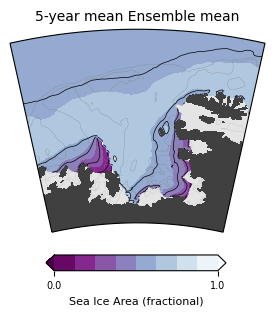

In [6]:
# Plot annual mean ensemble mean data


fp.make_contour_map('SIarea', sia_em, em_levs, cmap, plot_region, title='5-year mean Ensemble mean',save=None)



In [ ]:
# Plot ensemble mean
cmap = 'BuPu_r'
levs = np.linspace(0,1,13)
fs = 8


fig = plt.figure()
fig.set_size_inches((2,2.5))

lons, lats = data_x.lon, data_x.lat
lon_mid = (lon1+lon2)/2
grid_proj = ccrs.PlateCarree()

ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo(central_longitude=lon_mid)) 
cf = ax.contourf(lons, lats, color_data, transform=grid_proj,\
                 levels=levs, cmap=cmap, zorder=0, extend='both')
quiv = ax.quiver(lons, lats, data_x, data_y, transform = grid_proj, 
                 regrid_shape=12, scale=18, pivot = 'middle',
                 width=0.03, headlength=4, headaxislength=3.5,
                 minshaft=2,edgecolor='white',linewidth = 0.2,zorder=3)
ax.quiverkey(quiv, X=0.025, Y=0.15, U=vec_len, label=str(vec_len)+' m/s', labelpos='S', fontproperties={'size': fs})

# Plot bathyemtry and ice locations in all subplots, and format map extent
# Get bathymetry and ice data used on all plots
land_ice_ds = fda.get_bathymetry_and_troughs()
land_ice_ds = land_ice_ds.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))
lons,lats = land_ice_ds.lon, land_ice_ds.lat
# blevs = (500,1000)
blevs = (1000,)
ax.contour(lons,lats,land_ice_ds.bathy,blevs,colors='k',transform=grid_proj,linewidths=1,zorder=1)
white_cm = colors.ListedColormap(("lightgray","lightgray"))
ax.contourf(lons,lats,land_ice_ds.all_ice,transform=grid_proj,cmap=white_cm,zorder=2)
ax.contourf(lons,lats,land_ice_ds.grounded_ice,transform=grid_proj,cmap='binary_r',zorder=2)

# Set shape of map to match shape of data rather than a rectangle
rect = mpath.Path([[lon1, lat2], [lon2, lat2], [lon2, lat1], [lon1, lat1], [lon1, lat2]]).interpolated(50)
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())

    
fig.subplots_adjust(left=0.01,right=0.88,top=0.9,bottom=0.05,wspace=0.1,hspace=.05)
plt.title(title,fontsize=fs)


# Add colorbar
cb_ax = fig.add_axes([0.9,0.22,0.04,0.5])
cb_em = fig.colorbar(cf, cax=cb_ax, extend='both',orientation = 'vertical')  
cb_em.set_label('Pot. Temperature [degC]', fontsize=8)
cb_em.ax.tick_params(labelsize=fs-2)
cb_em.set_ticks([levs[0],0,levs[-1]])

<xarray.DataArray 'time' (time: 3)>
array([cftime.DatetimeNoLeap(2004, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 2, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2004-12-01 00:00:00 ... 2005-02-01 00:00:00
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
0
1
2
3
4
5
6
7
8
9
10
11


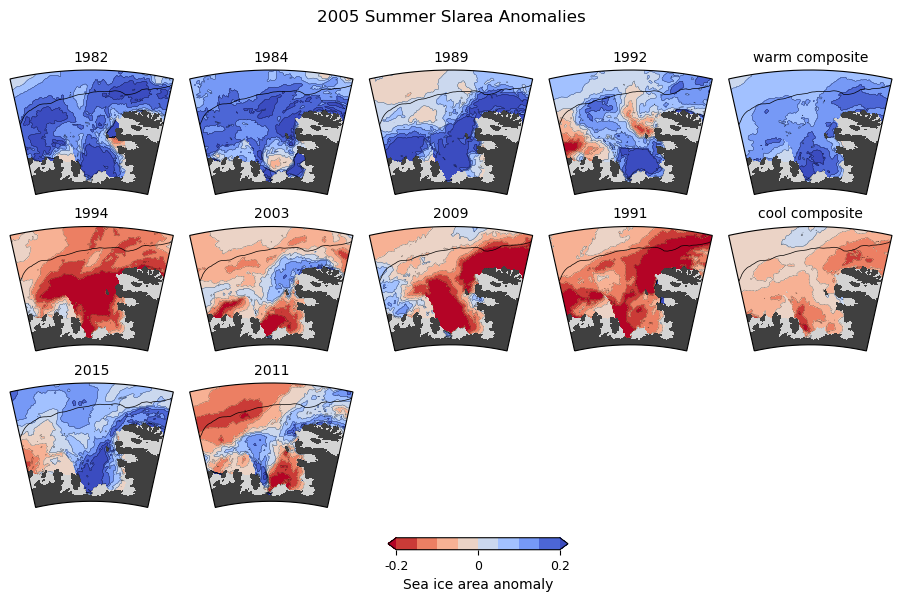

In [12]:
# Plot all member anomalies by season (capitalize first letter)
importlib.reload(fp)
season = 'Summer'
plot_yr = '2005'

plot_composites = True
save_seas_plot = False
anom_levs = anom_levs_dict[var]
anom_levs = np.linspace(-0.2,0.2,9)

if seasons:
    
    # calculate seasonal average for ens mean and each ensemble member
    # MAM = fall, JJA=winter, SON=spring, DJF=summer
    seas_dict = {'Summer':[str(int(plot_yr)-1)+'-12',plot_yr+'-02'],\
                 'Fall':[plot_yr+'-03',plot_yr+'-05'],\
                 'Winter':[plot_yr+'-06',plot_yr+'-08'],\
                 'Spring':[plot_yr+'-09',plot_yr+'-11']}
    start,stop = seas_dict[season]
    seas_ens_data = all_run_data.sel(time = slice(start,stop))
    print(seas_ens_data.time)
    seas_ens_time_avg = seas_ens_data.mean(dim='time')
    seas_ens_mean = seas_ens_time_avg.mean(dim = 'run')
    seas_ens_anom_data = seas_ens_time_avg - seas_ens_mean
    

    if plot_composites:
        fp.make_ensemble_subplots_with_composites(var, seas_ens_anom_data, anom_levs, cm,region,plot_yr+' '+season+' '+var+' Anomalies')

    else:
        fp.make_ensemble_subplots(var, seas_ens_anom_data, anom_levs, cm,region,plot_yr+' '+season+' '+var+' Anomalies')

if save_seas_plot:
    plt.savefig('Plots/Maps/Figure_'+var+'_maps_'+exp_set+'_with_composites_'+season+'_'+plot_yr+'.png',dpi=600)
    print('Saved fig!')

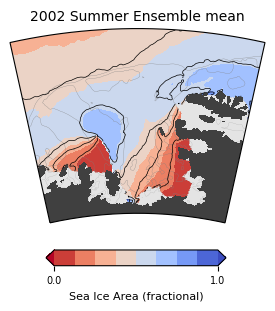

In [14]:
### Plot seasonal mean ensemble mean
importlib.reload(fp)
save_seas_em_plot = False
plot_yr = '2002'
season = 'Summer'

if seasons:
    seas_dict = {'Summer':[str(int(plot_yr)-1)+'-12',plot_yr+'-02'],\
                 'Fall':[plot_yr+'-03',plot_yr+'-05'],\
                 'Winter':[plot_yr+'-06',plot_yr+'-08'],\
                 'Spring':[plot_yr+'-09',plot_yr+'-11']}
    start,stop = seas_dict[season]
    seas_ens_data = all_run_data.sel(time = slice(start,stop))
    seas_ens_time_avg = seas_ens_data.mean(dim='time')
    seas_ens_mean = seas_ens_time_avg.mean(dim = 'run')

    levs = em_levs_dict['SIarea']

    if save_seas_em_plot:
        figname = 'Plots/Maps/Figure_'+var+'_EM_map_'+exp_set+'_'+season+'.png'
        fp.make_contour_map(var, seas_ens_mean, levs, cm,region,title=plot_yr+' ' +season+' Ensemble mean',save=figname)

    else:
        # Plot ensemble mean
        fp.make_contour_map(var, seas_ens_mean, levs, cm,region,title=plot_yr+' ' +season+' Ensemble mean',save=None)
    
        

<xarray.DataArray 'time' (time: 3)>
array([cftime.DatetimeNoLeap(2005, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 10, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2005, 11, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2005-09-01 00:00:00 ... 2005-11-01 00:00:00
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
0
1
2
3
4
5
6
7
8
9
10
11


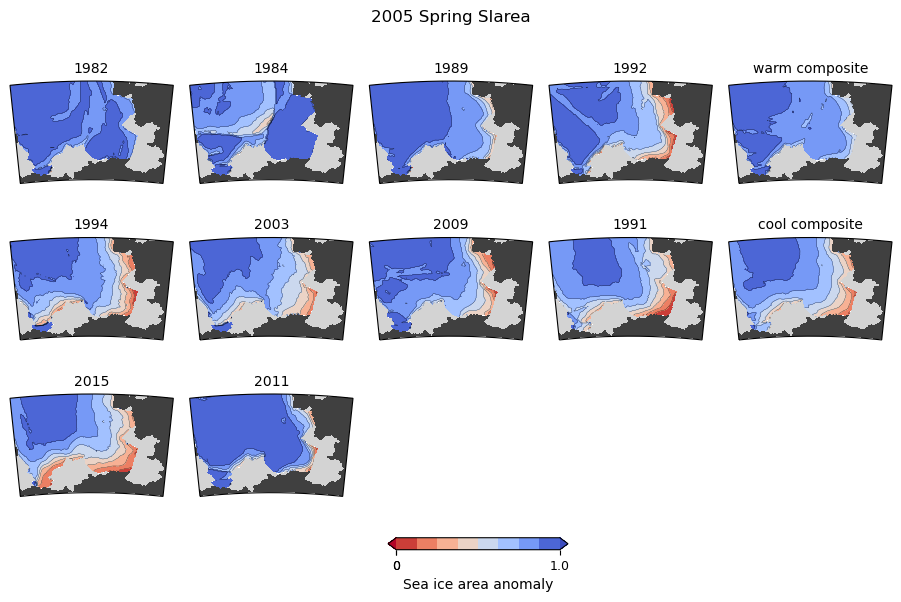

In [38]:
# Plot all member -actual values- by season (capitalize first letter)
importlib.reload(fp)
season = 'Spring'
plot_yr = '2005'

plot_composites = True
save_seas_plot = False
levs = em_levs_dict[var]

if seasons:
    
    # calculate seasonal average for ens mean and each ensemble member
    # MAM = fall, JJA=winter, SON=spring, DJF=summer
    seas_dict = {'Summer':[str(int(plot_yr)-1)+'-12',plot_yr+'-02'],\
                 'Fall':[plot_yr+'-03',plot_yr+'-05'],\
                 'Winter':[plot_yr+'-06',plot_yr+'-08'],\
                 'Spring':[plot_yr+'-09',plot_yr+'-11']}
    start,stop = seas_dict[season]
    seas_ens_data = all_run_data.sel(time = slice(start,stop))
    print(seas_ens_data.time)
    seas_ens_time_avg = seas_ens_data.mean(dim='time')
    

    if plot_composites:
        fp.make_ensemble_subplots_with_composites(var, seas_ens_time_avg, levs, cm,region,plot_yr+' '+season+' '+var)

    else:
        fp.make_ensemble_subplots(var, seas_ens_time_avg, levs, cm,region,plot_yr+' '+season+' '+var)

if save_seas_plot:
    plt.savefig('Plots/Maps/Figure_'+var+'_maps_'+exp_set+'_with_composites_'+season+'_'+plot_yr+'.png',dpi=600)
    print('Saved fig!')